# Kategorik Grafikler 
Kategorilerin Dağılımı

Tek özellik için **displot()** gibi dağılım grafiklerini araştırdık, ancak kategoriler arasındaki dağılımları karşılaştırmak istersek ne olur?

Örneğin, herkesin maaşının dağılımı yerine, eğitim düzeyine göre maaş dağılımlarını karşılaştırmak isteyebiliriz.

Kategoriler İçinde Dağılım:
- Boxplot (en yaygın olarak kullanılan)
- Violinplot
- Swarmplot
- Boxenplot (Letter-Value Plot)

Maaş veri setinde bu grafikleri anlamayı keşfedelim.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Veri

In [2]:
df = pd.read_csv("StudentsPerformance.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## boxplot()

Boxplot, sürekli bir değişkenin istatistiksel dağılım bilgilerini çeyrekleri kullanarak hızlı bir şekilde görsel bir formatta verir. 

Çeyrekler, verileri 4 eşit sayıda veri noktasına ayırır :
- Veri noktalarının %25'i alt çeyrekte (Q1).
- 50. yüzdelik dilim (Q2) medyandır. Medyan veriyi iki eşit parçaya böler.
- Tüm veri noktalarının %25'i (Q3)'ün üzerindedir. 

IQR : Çeyrekler arası açıklık (kutu genişliğini tanımlar).
$$IQR = Q_3 - Q_1$$
Tüm veri noktalarının yarısı kutu içindedir.

Kutu dışındaki sol ve sağ açıklıklar $1.5\times IQR$ 'dır. Bunun dışında kalan tekil noktalara **aykırı noktalar** denir.

<a> <img src='quantile.png' /></a>

Çeyrekler ve aykırı değerler için IQR kullanımı yoluyla boxplot()--kutu grafiği.

<AxesSubplot:xlabel='math score'>

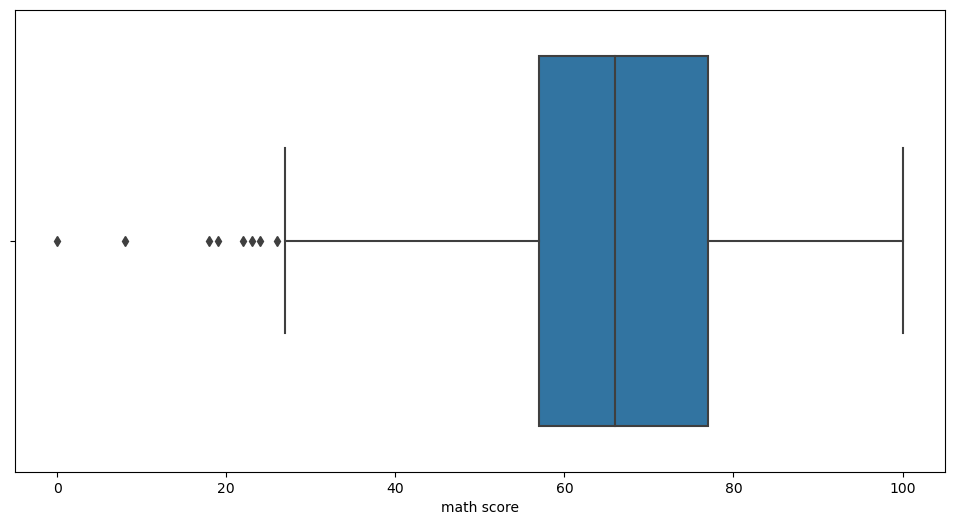

In [5]:
# Tek özellik için kutu grafiği 
plt.figure(figsize=(12,6))
sns.boxplot(x='math score',data=df)

Bu grafikten matematik skorunun yaklaşık 64 civarında

<AxesSubplot:ylabel='math score'>

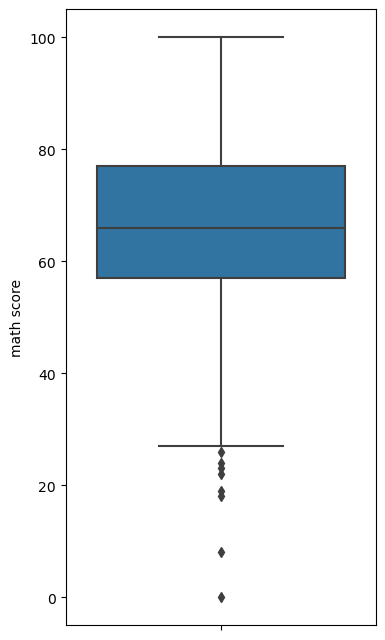

In [6]:
# Tek özellik için dikey kutu grafiği 
plt.figure(figsize=(4,8))
sns.boxplot(y='math score',data=df,orient='v')

<AxesSubplot:xlabel='parental level of education', ylabel='math score'>

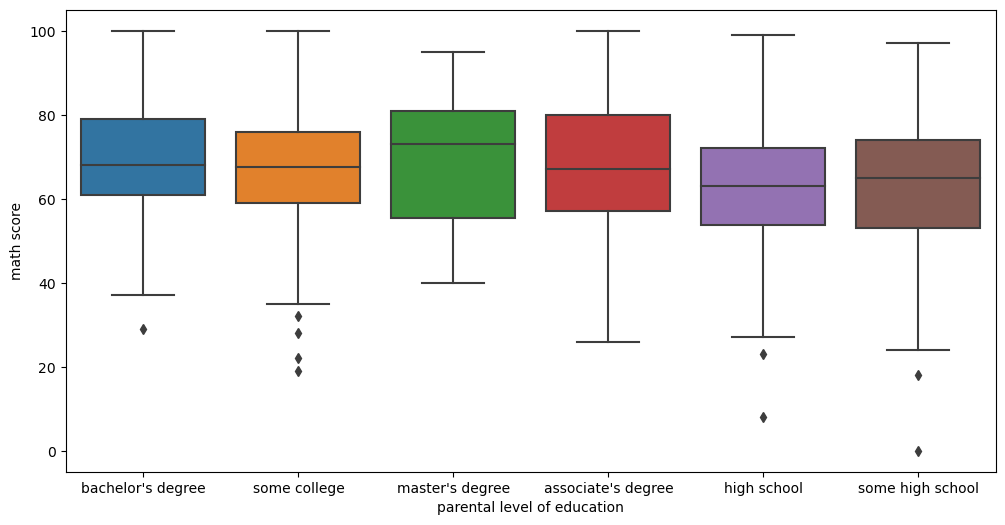

In [7]:
# Kategori başına kutu grafiği 
plt.figure(figsize=(12,6))
sns.boxplot(x='parental level of education',y='math score',data=df)

### Hue parametresi ile daha fazla kategorik bölümlere ayırma

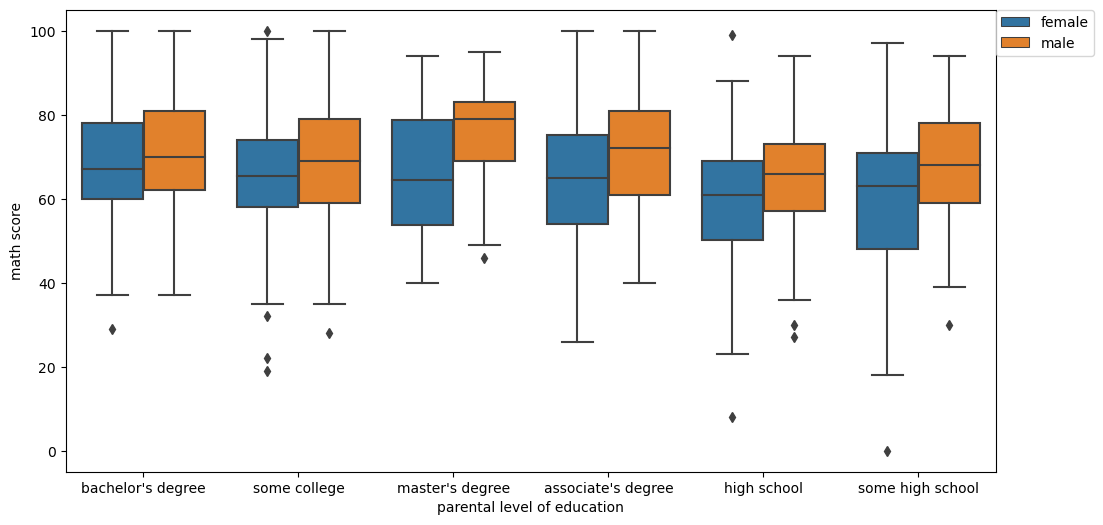

In [8]:
plt.figure(figsize=(12,6))
sns.boxplot(x='parental level of education',y='math score',data=df,hue='gender')

# İsteğe bağlı legend'ı dışarıya taşıma
plt.legend(bbox_to_anchor=(1., 1), loc=2, borderaxespad=0.)

### boxplot() Stil Parametreleri

#### Orientation parametresi

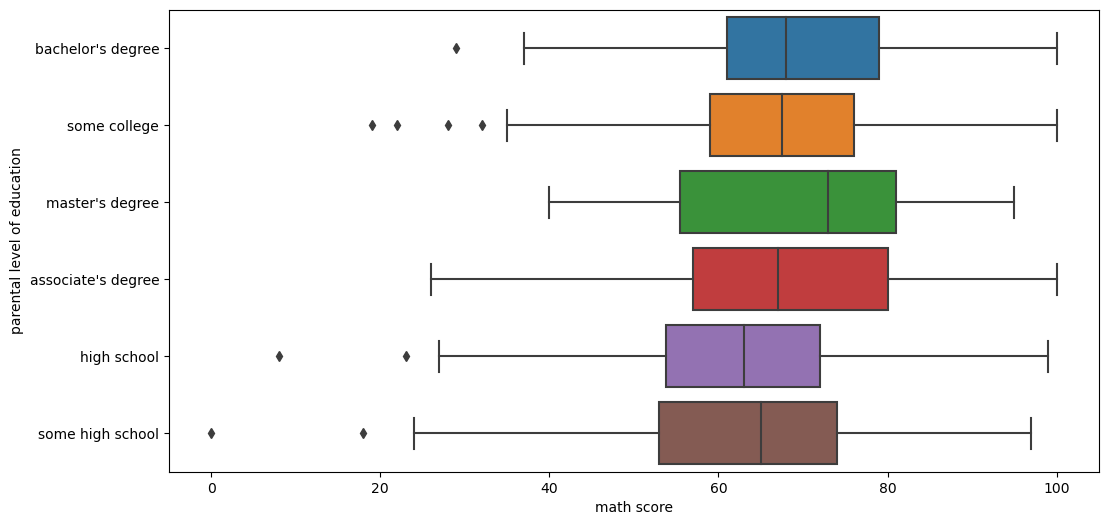

In [9]:
# YÖNLENDİRMENİN ANLAMLI OLMASI İÇİN X VE Y'Yİ 
# NASIL DEĞİŞTİRMEMİZ GEREKTİĞİNE DİKKAT EDİN!
plt.figure(figsize=(12,6))
sns.boxplot(x='math score',y='parental level of education',data=df,orient='h');

#### Width parametresi

<AxesSubplot:xlabel='parental level of education', ylabel='math score'>

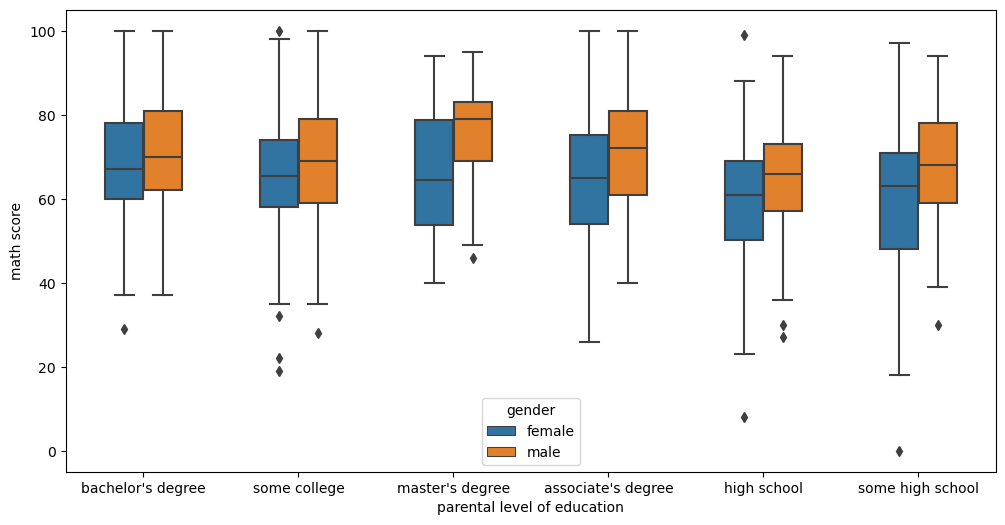

In [10]:
plt.figure(figsize=(12,6))
sns.boxplot(x='parental level of education',y='math score',
            data=df,hue='gender',width=0.5)

## violinplot()

Bir (veya daha fazla) kategorik değişkenin çeşitli seviyelerinde nicel verilerin dağılımını gösterir, böylece bu dağılımlar karşılaştırılabilir. Tüm çizim bileşenlerinin gerçek veri noktalarına karşılık geldiği bir boxplot() grafiğinden farklı olarak, violinplot() grafiği, KDE kullanarak verilerdeki olasılık yoğunluğu görüntüler. Bu grafiği aynalanmış bir KDE grafiği olarak düşünebiliriz.

<AxesSubplot:xlabel='math score', ylabel='Density'>

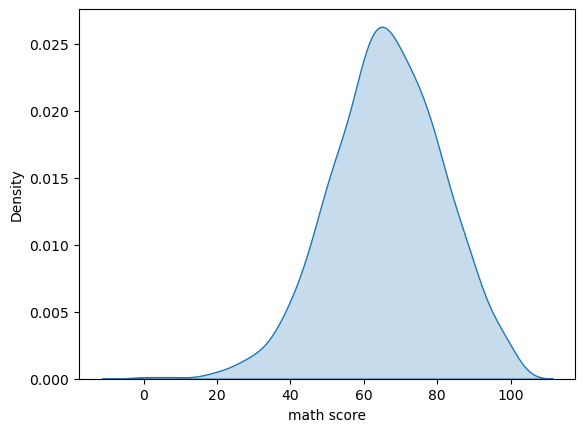

In [11]:
# Tek bir özelliğin KDE'si
sns.kdeplot(x='math score',data=df,shade=True)

<AxesSubplot:xlabel='parental level of education', ylabel='math score'>

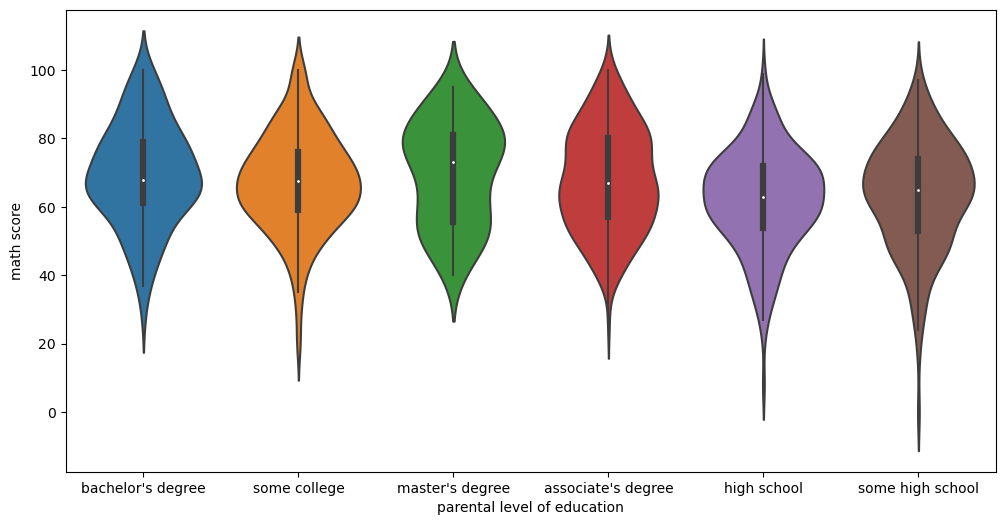

In [12]:
# her kategori başına violinplot() oluşturulur
plt.figure(figsize=(12,6))
sns.violinplot(x='parental level of education',y='math score',data=df)

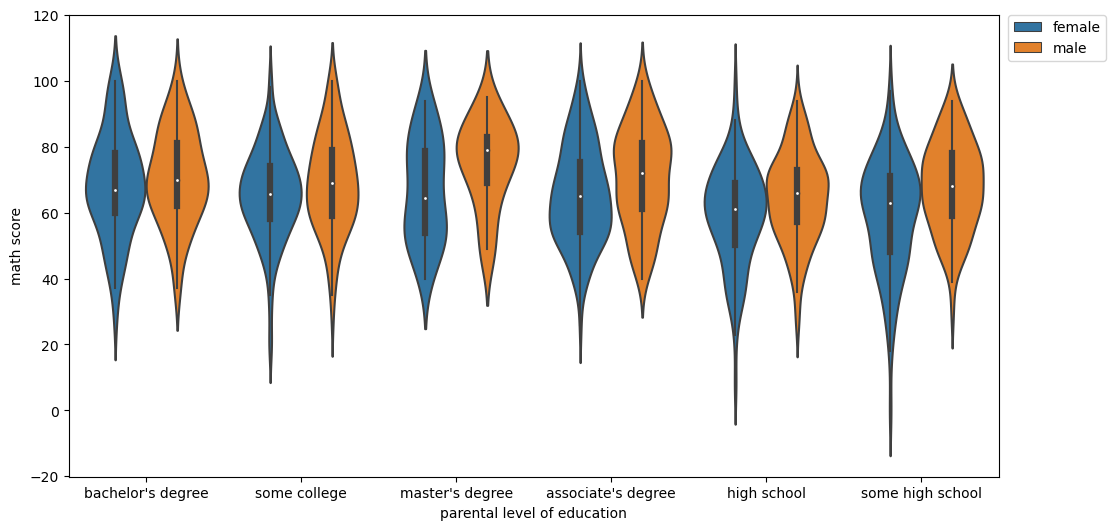

In [13]:
plt.figure(figsize=(12,6))
sns.violinplot(x='parental level of education',y='math score',
               data=df,hue='gender')

# İsteğe bağlı legend'ı dışarıya taşıma
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)

### violinplot() grafiğinin parametreleri

#### Split parametresi
**split=True** ile her düzey için kemanın yarısı çizilir. Bu, dağılımları doğrudan karşılaştırmayı kolaylaştırabilir.

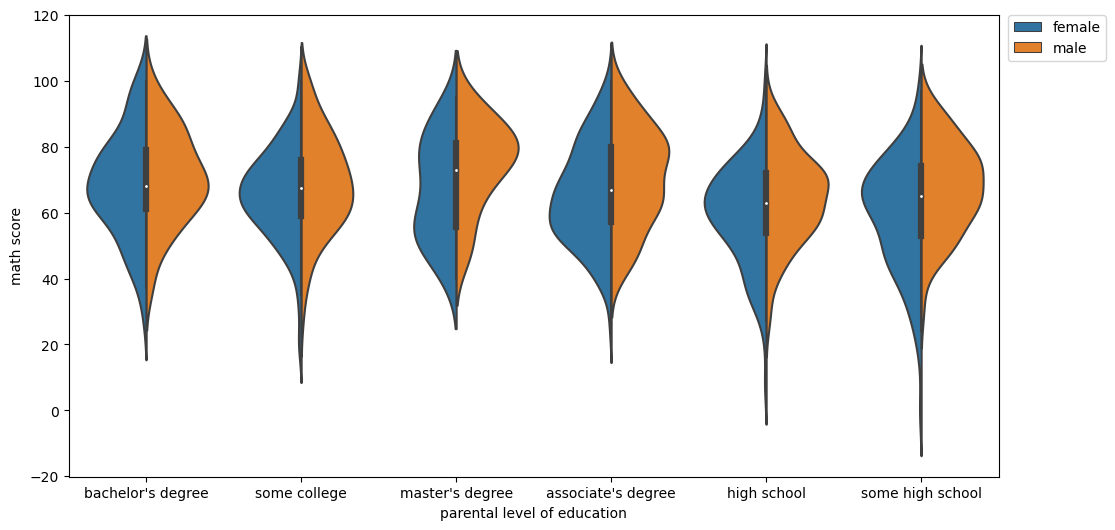

In [14]:
plt.figure(figsize=(12,6))
sns.violinplot(x='parental level of education',y='math score',
               data=df,hue='gender',split=True)

# İsteğe bağlı legend'ı dışarıya taşıyın
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)

#### inner parametresi

violinplot grafiğinin iç kısmındaki veri noktalarının temsili varsayılan olarak 'box''tır ve içeride minyatür bir kutu grafiği çizer. 'quartile', dağılımın çeyreklerini çizer. 'point', alınan her veri noktasını gösterir. **None**, violin'ları çizer.

<AxesSubplot:xlabel='parental level of education', ylabel='math score'>

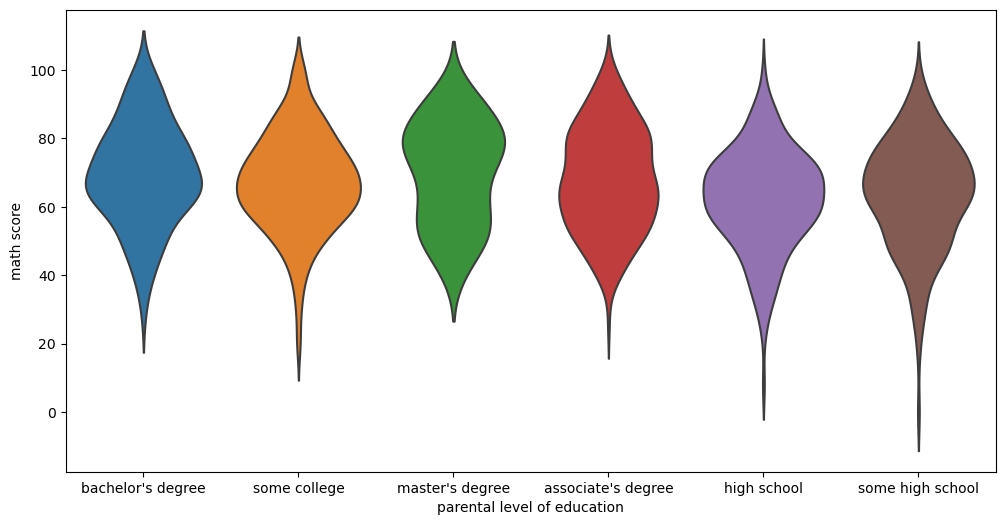

In [16]:
plt.figure(figsize=(12,6))
sns.violinplot(x='parental level of education',y='math score',
               data=df,inner=None)

<AxesSubplot:xlabel='parental level of education', ylabel='math score'>

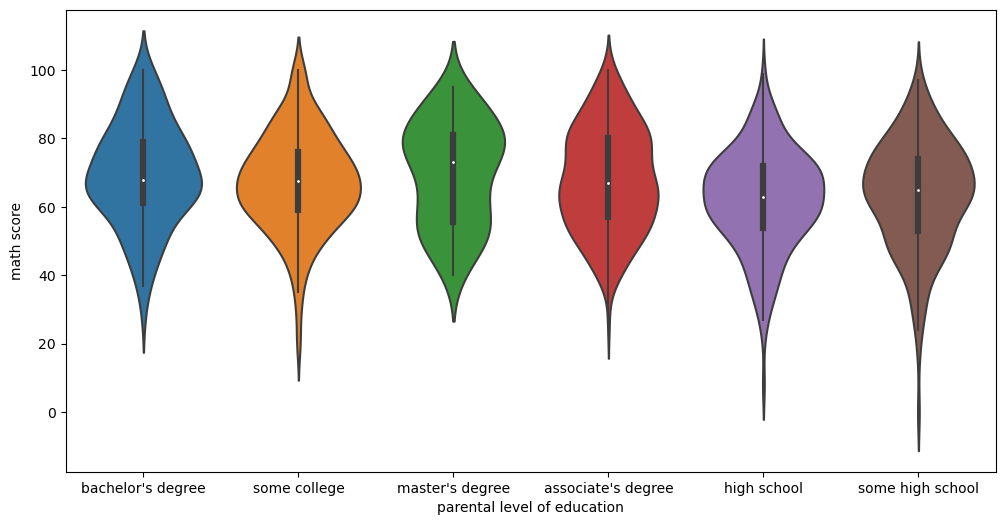

In [17]:
plt.figure(figsize=(12,6))
sns.violinplot(x='parental level of education',y='math score',
               data=df,inner='box')

<AxesSubplot:xlabel='parental level of education', ylabel='math score'>

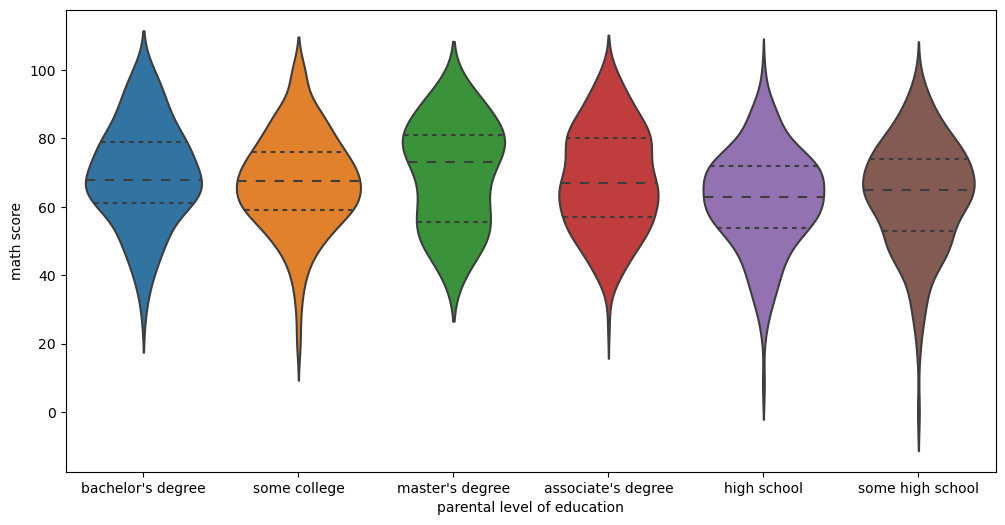

In [18]:
plt.figure(figsize=(12,6))
sns.violinplot(x='parental level of education',y='math score',
               data=df,inner='quartile')


<AxesSubplot:xlabel='parental level of education', ylabel='math score'>

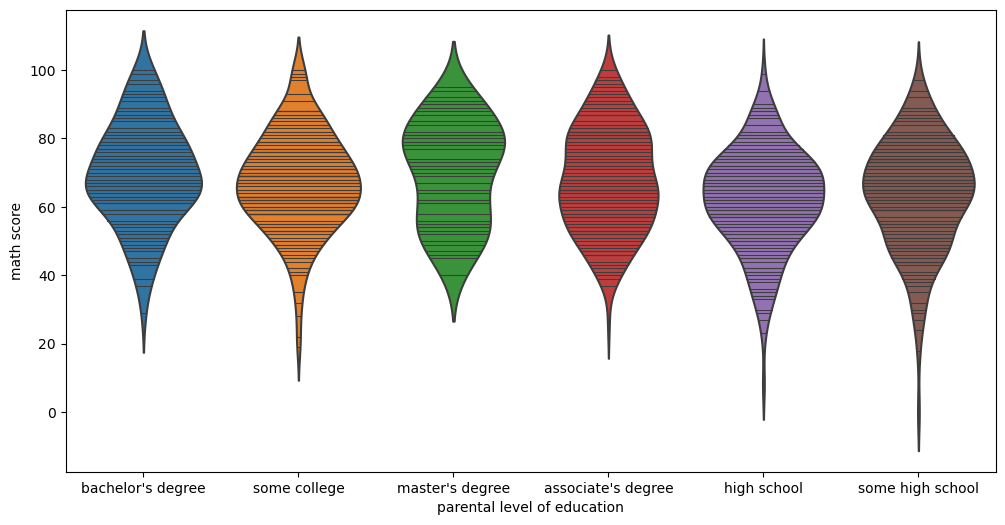

In [19]:
plt.figure(figsize=(12,6))
sns.violinplot(x='parental level of education',y='math score',
               data=df,inner='stick')

#### orientation parametresi

<AxesSubplot:xlabel='math score', ylabel='parental level of education'>

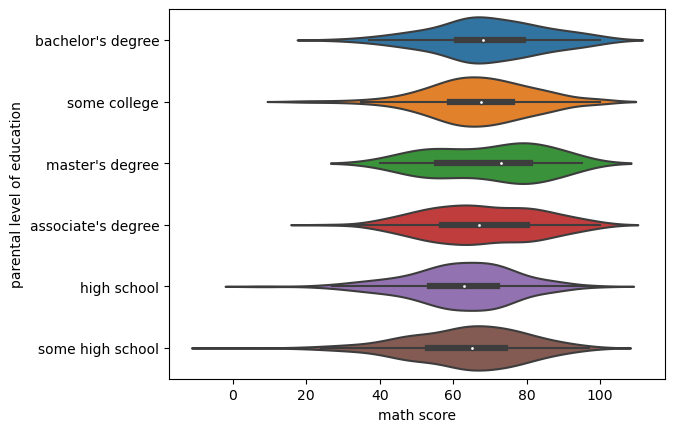

In [20]:
# Sürekli değişkeni y ve kategorik değişkeni x olarak değiştirin
sns.violinplot(x='math score',y='parental level of education',
               data=df,)

#### bandwidth parametresi

kdeplot için bant genişliği argümanına benzer

<AxesSubplot:xlabel='parental level of education', ylabel='math score'>

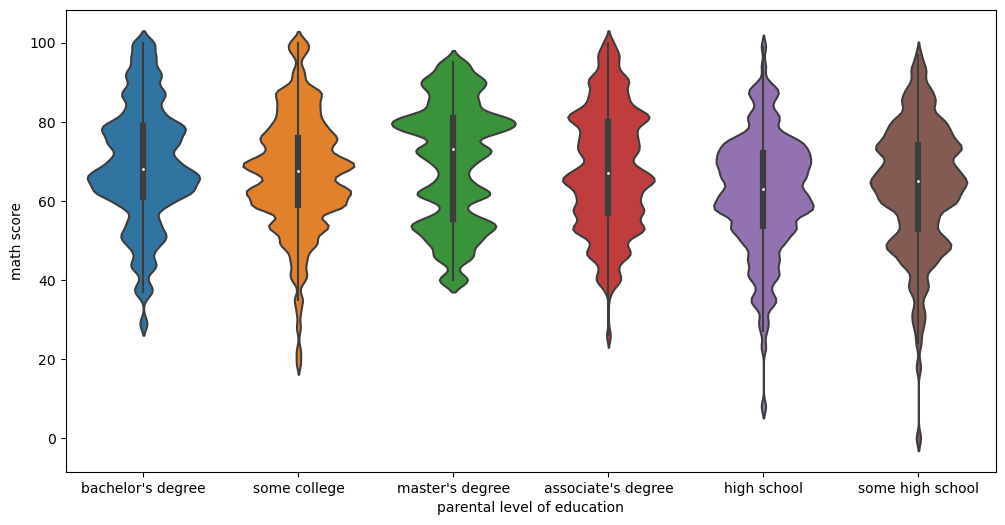

In [21]:
plt.figure(figsize=(12,6))
sns.violinplot(x='parental level of education',y='math score',
               data=df,bw=0.1)

# Gelişmiş Grafikler

In [22]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## swarmplot()

Swarmplot, dağılımdaki tüm veri noktalarını gösteren çok basit bir grafiktir. Çok büyük veri kümeleri için tüm noktalar gösterilemez, ancak bunların genel dağılımını gösterir.

/Users/hoze/opt/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='math score'>

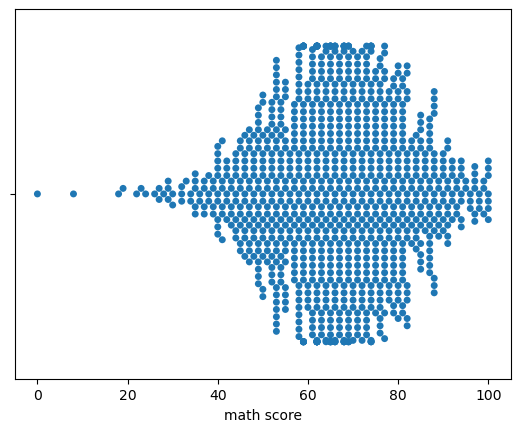

In [24]:
sns.swarmplot(x='math score',data=df)

<AxesSubplot:xlabel='math score'>

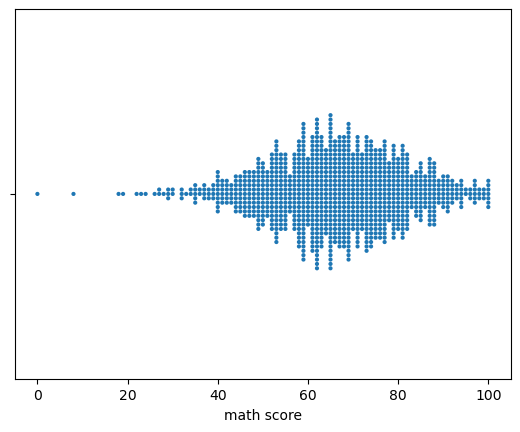

In [25]:
# Daha fazlasını göstermek için noktaların boyutunu değiştirme
sns.swarmplot(x='math score',data=df,size=3)

<AxesSubplot:xlabel='math score', ylabel='race/ethnicity'>

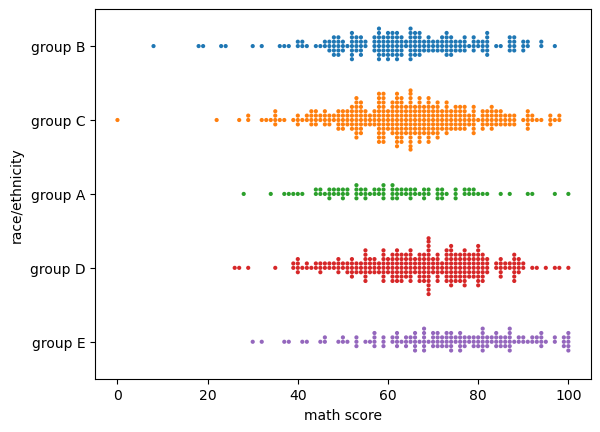

In [26]:
# kategori başına swarmplot
sns.swarmplot(x='math score',y='race/ethnicity',data=df,size=3)

<AxesSubplot:xlabel='race/ethnicity', ylabel='math score'>

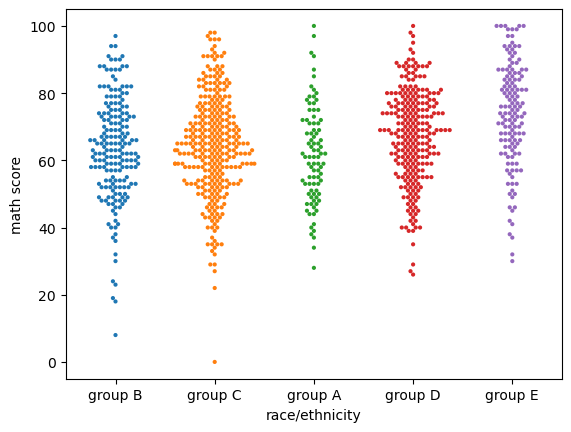

In [27]:
sns.swarmplot(x='race/ethnicity',y='math score',data=df,size=3)

<AxesSubplot:xlabel='race/ethnicity', ylabel='math score'>

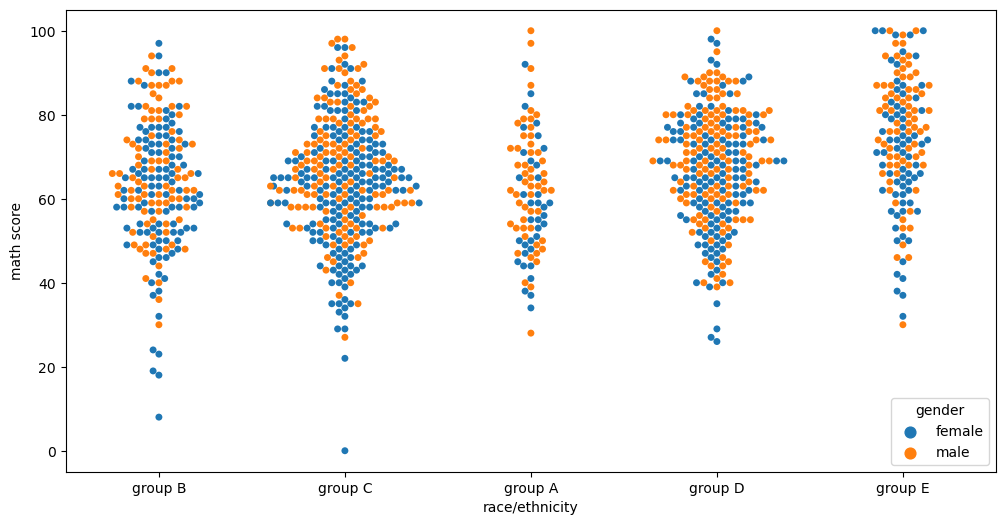

In [28]:
plt.figure(figsize=(12,6))
sns.swarmplot(x='race/ethnicity',y='math score',data=df,hue='gender')

<AxesSubplot:xlabel='race/ethnicity', ylabel='math score'>

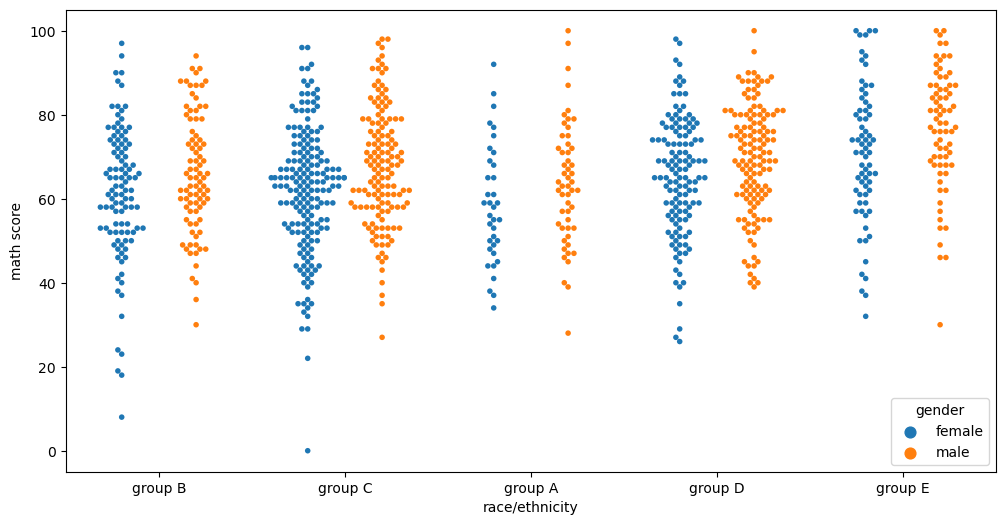

In [29]:
plt.figure(figsize=(12,6))
sns.swarmplot(x='race/ethnicity',y='math score',data=df,
              hue='gender',dodge=True,s=4)

### boxenplot() (letter-value plot)

Bu çizim stili, 'harf değerleri' olarak tanımlanan çok sayıda niceliği gösterdiği için başlangıçta 'harf değeri' grafiği olarak adlandırıldı. Tüm özelliklerin gerçek gözlemlere karşılık geldiği bir dağılımın parametrik olmayan bir temsilini çizerken bir kutu grafiğine benzer. Daha fazla nicelik çizerek, özellikle kuyruklarda, dağılımın şekli hakkında daha fazla bilgi sağlar.

<AxesSubplot:xlabel='math score', ylabel='race/ethnicity'>

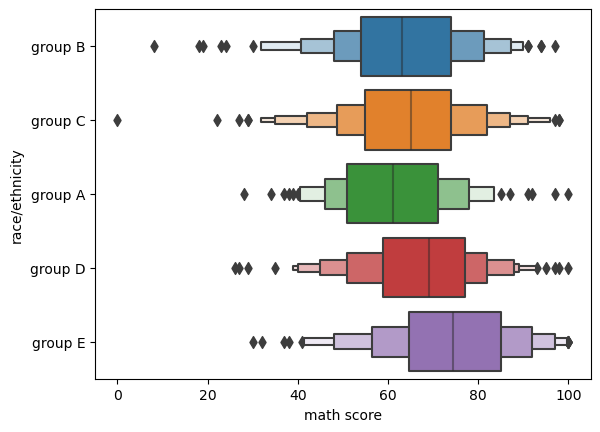

In [30]:
sns.boxenplot(x='math score',y='race/ethnicity',data=df)

<AxesSubplot:xlabel='race/ethnicity', ylabel='math score'>

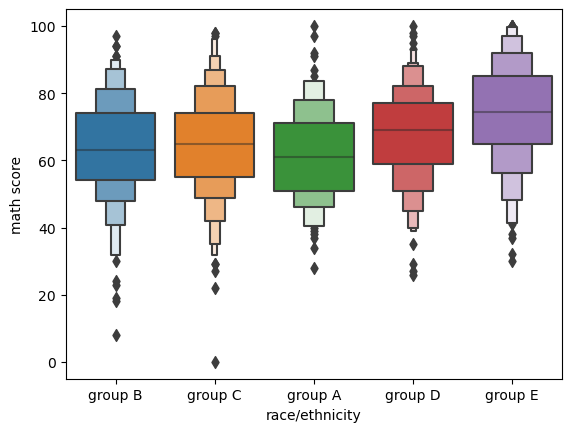

In [31]:
sns.boxenplot(x='race/ethnicity',y='math score',data=df)

<AxesSubplot:xlabel='race/ethnicity', ylabel='math score'>

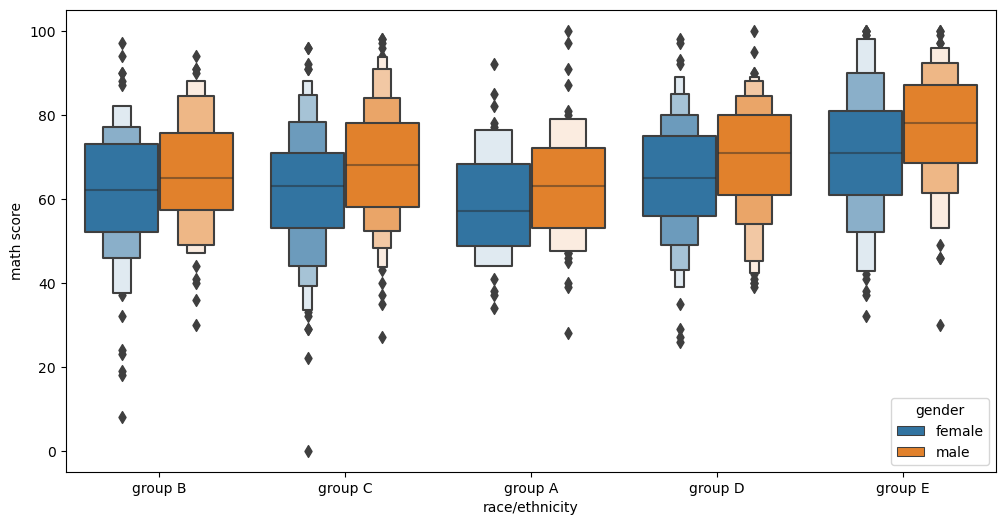

In [32]:
plt.figure(figsize=(12,6))
sns.boxenplot(x='race/ethnicity',y='math score',data=df,hue='gender')

# SON!